# Bike Sharing System Data exploration
## by Peter Liu

## Preliminary Wrangling

> This document explores a dataset containing renting time, information of bike stations and renters for approximately 180,000 renting data.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Assessing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df[df.start_station_id.isna()].shape

(197, 16)

In [6]:
df[df.member_birth_year.isna()].shape

(8265, 16)

In [7]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### Quality issues

- Erroneous datatypes(start_time, end_time, start_station_id, end_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip)

###### Erroneous datatypes(start_time, end_time, start_station_id, end_station_id, bike_id, user_type, member_gender, bike_share_for_all_trip)

###### Define
> Change the datatype of start_time and end_time from string into datetime using `to_datetime`  
> Change the datatype of start_station_id, end_station_id, bike_id from float into string using `astype`  
> Change the datatype of user_type, member_gender, bike_share_for_all_trip from string into category using `astype`  

###### Code

In [8]:
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [9]:
df.start_station_id = df.start_station_id.astype('str').str[:-2]
df.start_station_id = df.start_station_id.replace('n', np.nan)
df.end_station_id = df.end_station_id.astype('str').str[:-2]
df.end_station_id = df.end_station_id.replace('n', np.nan)
df.bike_id = df.bike_id.astype('str')

In [10]:
df.user_type = df.user_type.astype('category')
df.member_gender = df.member_gender.astype('category')
df.bike_share_for_all_trip = df.bike_share_for_all_trip.astype('category')

###### Test

In [11]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23,The Embarcadero at Steuart St,37.791464,-122.391034,81,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27,Beale St at Harrison St,37.788059,-122.391865,324,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278,The Alameda at Bush St,37.331932,-121.904888,277,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> There are 183,412 rows in the dataset with 15 features, five features are numeric in nature(duration_sec, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude), yet there are 197 NaN in station id and station name, and 8265 NaN in member_birth_year and member gender.

### What is/are the main feature(s) of interest in your dataset?

> First of all, I want to know when are most trips taken in terms of time of day, day of the week, so the number of rows and "start_time" are the main features.  

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Second, I also wonder what kind of people would take the most trips. The categorical variables('user_type', 'member_gender', 'member_birth_year') would help us find out. 

## Univariate Exploration


First of all, I would like to look at the renting time, so I choose the feature, "start_time".

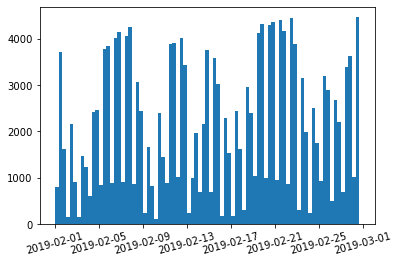

In [13]:
# histogram plot of strat_time
base = datetime.datetime(df.start_time.min().year, df.start_time.min().month, df.start_time.min().day)
bins = np.array([base + datetime.timedelta(hours=i) for i in range(0, 24*28, 8)])
plt.hist(data=df, x='start_time', bins=bins)
plt.xticks(rotation=15);

The distribution of "start_time" seems to not be continuous, so I decide to engineer the "start_time" to discrete data and use countplot from seaborn to display it.

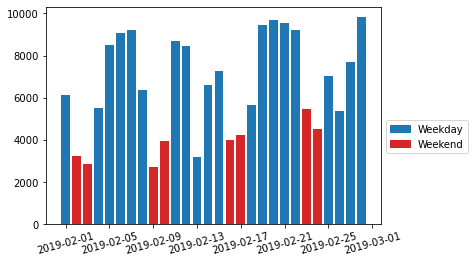

In [14]:
# extract the year, month, day from start_time
first_time = df.start_time.min().strftime('%Y-%m-%d')
last_time = df.start_time.max().strftime('%Y-%m-%d')
# make a time index
time_bin = pd.date_range(first_time, last_time, freq='D')
workday = pd.date_range(first_time, last_time, freq='B')

# make weekday and weekend have different color
colors = []
for value in time_bin: 
    if value in workday:
        colors.append(sb.color_palette()[0])
    else:
        colors.append(sb.color_palette()[3])

# bar plot of start_time separated by day
num_day = df.groupby(df.start_time.map(lambda x: x.day)).duration_sec.count()
ax = plt.bar(time_bin, num_day, color=colors)
plt.xticks(rotation=15);

# make the legend
Handles = [plt.Rectangle((0,0),1,1, color=sb.color_palette()[0]), plt.Rectangle((0,0),1,1, color=sb.color_palette()[3])]
labels = ['Weekday','Weekend']
plt.legend(Handles, labels, bbox_to_anchor=(1, 0.5));

It seems to have regular ups and downs, with most data on weekday (blue bar), the few on weekend (red bar). Interesting, there is relatively low amount on February 13, 2019, and I take a deep look. I find that there was a heavy rain on February 13, 2019 in San Francisco, here is [link](https://www.kron4.com/news/san-francisco-sees-flooded-roadways-during-storm/).

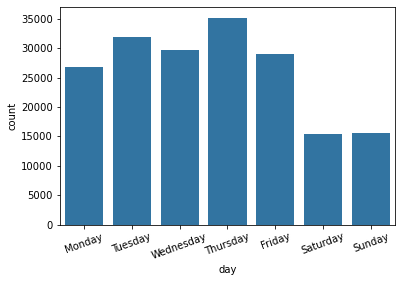

In [15]:
# make a new column "day"
df['day'] = df.start_time.dt.day_name()
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
default_color = sb.color_palette()[0]
sb.countplot(data=df, x='day', color=default_color, order=days)
plt.xticks(rotation=20);

It's better to explore if it's separated by the days of week. It shows that the renting number of weekday is greater than weekend.

Next, I would like to know what time of the day has the most renting number.

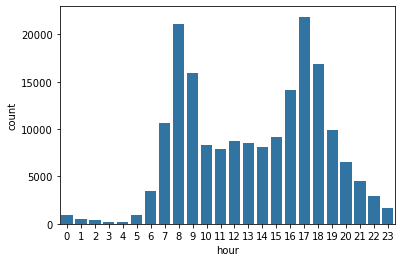

In [16]:
# make a column extract the hour from start_time
df['hour'] = df['start_time'].dt.hour
sb.countplot(data=df, x='hour', color=default_color);

It shows that when in 7am-9am and 4pm-6pm, there are a lot of bikes be rented. And when at 8pm, the renting number have been decreased until 5am. And 7am-9am, 4pm-6pm are just the rush hour in San Francisco. 

Appropriate time sections would help us easier to distinguish the difference of variables. I want to separate time by 3 hours, then 7am-9am and 4pm-6pm, respectively, can be one section.

In [17]:
# make a new column to separate hour into eight section
time_section = []
for x in df.hour:
    if (x >= 1 and x <=3):
        time_section.append('1am-3am')
    elif (x >= 4 and x <=6):
        time_section.append('4am-6am')
    elif (x >= 7 and x <=9):
        time_section.append('7am-9am')
    elif (x >= 10 and x <=12):
        time_section.append('10am-12pm')
    elif (x >= 13 and x <=15):
        time_section.append('1pm-3pm')
    elif (x >= 16 and x <= 18):
        time_section.append('4pm-6pm')
    elif (x >= 19 and x <=21):
        time_section.append('7pm-9pm')
    else: 
        time_section.append('10pm-12am')
df['time_section'] = time_section

In [18]:
time_sec = ['1am-3am', '4am-6am', '7am-9am', '10am-12pm', '1pm-3pm', '4pm-6pm', '7pm-9pm', '10pm-12am']

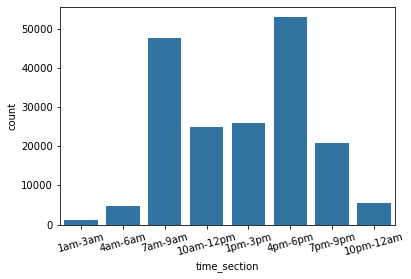

In [19]:
sb.countplot(data=df, x='time_section', color=default_color, order=time_sec)
plt.xticks(rotation=15);

Next, let's see the distribution of duration time

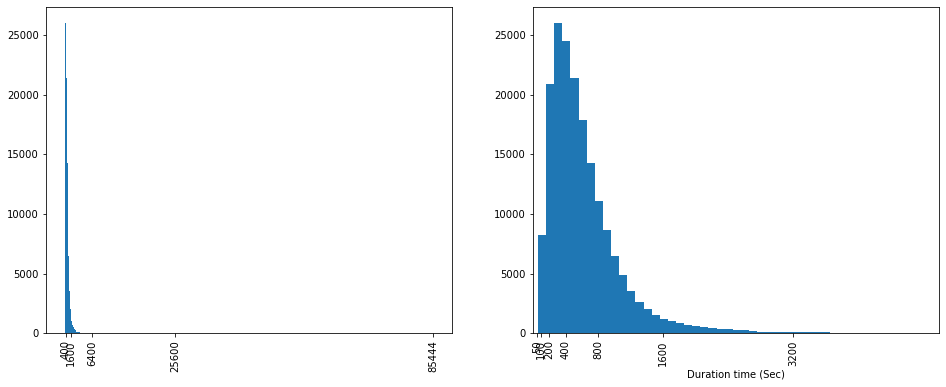

In [20]:
# histogram plot of duration_sec
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+100 , 100)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xticks([400, 1600, 6400, 25600, df.duration_sec.max()], [400, 1600, 6400, 25600, df.duration_sec.max()], rotation=90)

# zoom in
plt.subplot(1,2,2)
bins = np.arange(df['duration_sec'].min(), df['duration_sec'].max()+100 , 100)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xticks([50, 100, 200, 400, 800, 1600, 3200], [50, 100, 200, 400, 800, 1600, 3200], rotation=90)
plt.xlim([0,5000])
plt.xlabel('Duration time (Sec)');

Suprisely, the distribution of "duration_sec" is extremely left side due to few extreme big number, and it makes plot difficult to explore. Therefore, I limit the xscale in 0 through 5000 to see the distribution of most data located. Interesting, it looks like a exponential distribution which has a long right tail. Most data is concentrated around 400 seconds and amount decrease when duration time is increasing.

In [21]:
np.log10(df.duration_sec.describe())

count    5.263428
mean     2.860984
std      3.253917
min      1.785330
25%      2.511883
50%      2.710963
75%      2.900913
max      4.931682
Name: duration_sec, dtype: float64

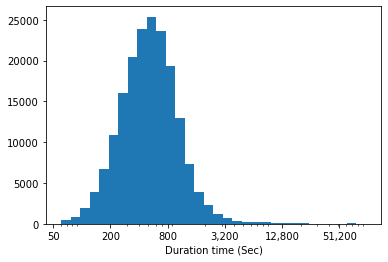

In [22]:
# histogram plot of duration_sec with log transformation
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1)
plt.hist(data=df, x='duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 200, 800, 3200, 12800, 51200], [50, 200, 800, '3,200', '12,800', '51,200'])
plt.xlabel('Duration time (Sec)');

When plotted on a log-scale, the duration time distribution looks roughly unimodal, with the peak between 400 and 800, and it seems like the normal distribution.

Next, let's see the distribution of members' birth year.

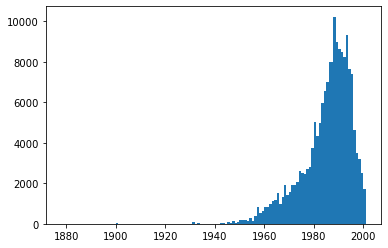

In [23]:
# histogram plot of member_birth_year
year_bins = np.arange(df[df.member_birth_year != 0].member_birth_year.min(), df.member_birth_year.max()+1, 1)
plt.hist(data=df, x='member_birth_year', bins=year_bins);

The left-skewed distribution is located on right side, it means there are some outliners on left side.

In [24]:
df[df.member_birth_year != 0].member_birth_year.sort_values()

27370     1878.0
72711     1900.0
41319     1900.0
173711    1900.0
94616     1900.0
           ...  
183354       NaN
183356       NaN
183363       NaN
183371       NaN
183402       NaN
Name: member_birth_year, Length: 183412, dtype: float64

The eldest person in dataset was born in 1878 which means 141 years old, however the vertified oldest person is 122 years old, so it very likely a typo. Because it just a row in plenty rows, I decide to remove it.

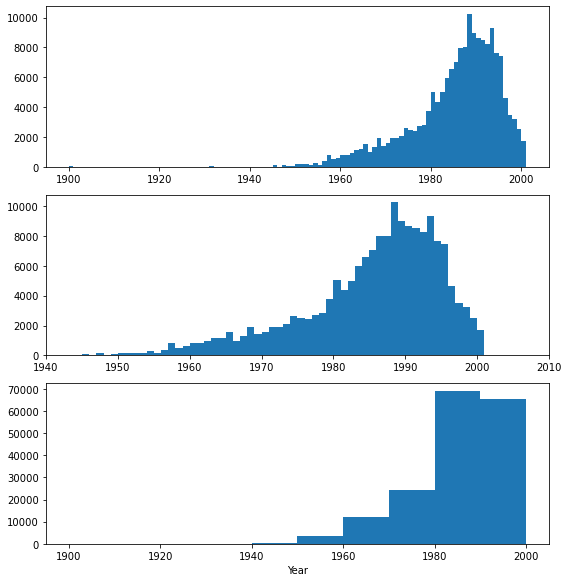

In [25]:
# remove the unreasonable data
i = df[(df.member_birth_year == 1878)].index
df.drop(i, axis=0, inplace=True)
plt.figure(figsize=[8,8])
plt.subplot(3,1,1)
year_bins = np.arange(df[df.member_birth_year != 0].member_birth_year.min(), df.member_birth_year.max()+1, 1)
plt.hist(data=df, x='member_birth_year', bins=year_bins)

# zoom in 
plt.subplot(3,1,2)
year_bins = np.arange(df[df.member_birth_year != 0].member_birth_year.min(), df.member_birth_year.max()+1, 1)
plt.hist(data=df, x='member_birth_year', bins=year_bins)
plt.xlim([1940, 2010])

# set the bins with 10 years
plt.subplot(3,1,3)
year_bins = np.arange(df[df.member_birth_year != 0].member_birth_year.min(), df.member_birth_year.max()+1, 10)
plt.hist(data=df, x='member_birth_year', bins=year_bins)

plt.tight_layout()
plt.xlabel('Year');

Most data is concentrated between 1980s and 1990s, and there is a cliff at 2001. It may means renter must be above 18 years old.

Next, let's see the distribution of user_type and member_gender.

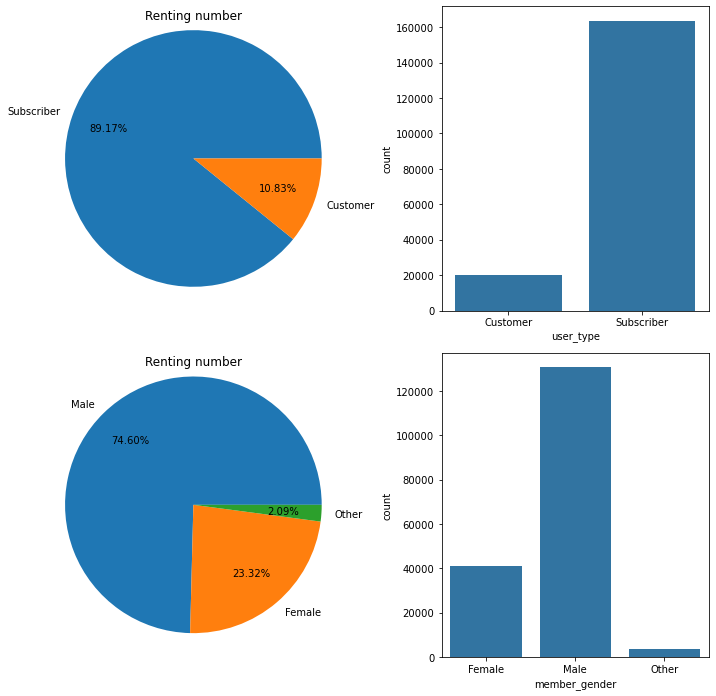

In [26]:
# pie chart and bar chart of user_type
default_color = sb.color_palette()[0]
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
plt.pie(df.user_type.value_counts(), labels =df.user_type.value_counts().index, autopct='%.2f%%', radius=1.2, pctdistance=0.7)
plt.title('Renting number')

plt.subplot(2,2,2)
sb.countplot(data=df, x='user_type', color=default_color)

# pie chart and bar chart of member_gender
plt.subplot(2,2,3)
plt.pie(df.member_gender.value_counts(), labels =df.member_gender.value_counts().index, autopct='%.2f%%', radius=1.2, pctdistance=0.7);
plt.title('Renting number')

plt.subplot(2,2,4)
sb.countplot(data=df, x='member_gender', color=default_color)
plt.tight_layout();

It appears that approximately 90% renters are subscribers and 74.6% renters are male.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After seperating "start_time" into days of week and 24 hours, it shows that the renting number of weekday is greater than weekend's and the renting number aggregate in rush hours.  
> The distribution of "duration_sec" seems like exponential distribution, so I decide to use log transformation. After transformation, the distribution is more like normal distribution.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distribution of "member_birth_year" looks weird. The data aggregate on the right side, not on the middle, that means there is few outliners on the left side. The eldest person in dataset was born in 1878 which means 141 years old, however the vertified oldest person is 122 years old, so it very likely a typo. Because it just a row in plenty rows, I decide to remove it.

## Bivariate Exploration


First of all, let's see the correlation of numeric variations.

In [27]:
numeric_vars = ['duration_sec', 'member_birth_year']
categoric_vars = ['user_type', 'member_gender', 'time_section', 'day']

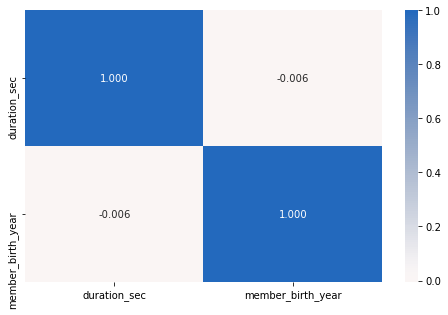

In [28]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

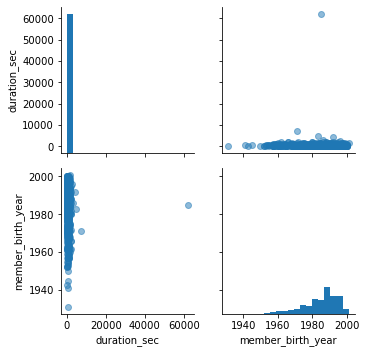

In [29]:
# plot matrix with 1000 samples due to avoiding overlapping
df_sample = df.sample(1000)

g = sb.PairGrid(data = df_sample, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter, alpha=0.5);

We can say that the relationship between duration_sec and member_birth_year is very weak. They are almost independent variables.

Next, I would like to see the relationship between duration time and categoric variables.

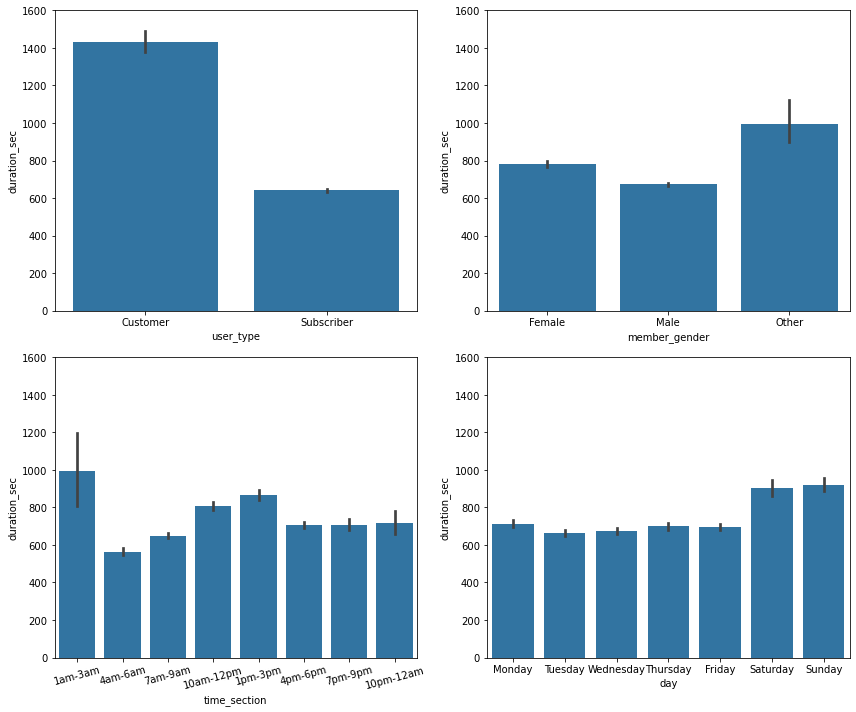

In [30]:
# barplot of duration time against categoric variables
plt.figure(figsize=[12,10])
plt.subplot(2,2,1)
sb.barplot(data=df, x='user_type', y='duration_sec', color=default_color)
plt.ylim([0,1600])

plt.subplot(2,2,2)
sb.barplot(data=df, x='member_gender', y='duration_sec', color=default_color)
plt.ylim([0,1600])

plt.subplot(2,2,3)
sb.barplot(data=df, x='time_section', y='duration_sec', color=default_color, order=time_sec)
plt.ylim([0,1600])
plt.xticks(rotation=15)

plt.subplot(2,2,4)
sb.barplot(data=df, x='day', y='duration_sec', color=default_color, order=days)
plt.ylim([0,1600])

plt.tight_layout();

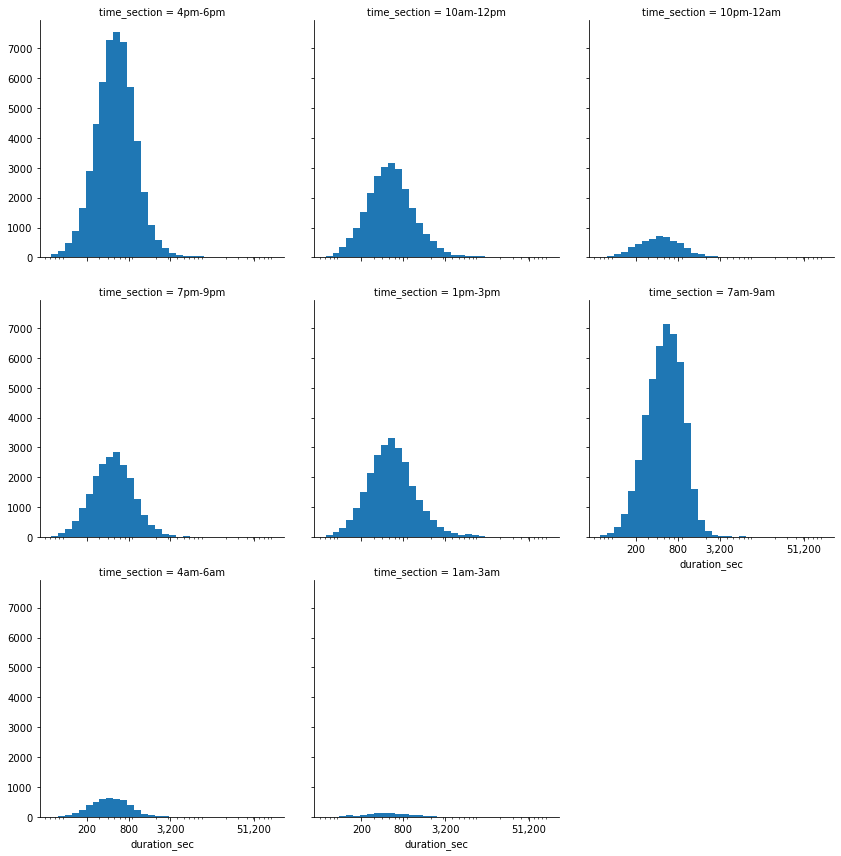

In [31]:
# histogram of duration time against different time section
g= sb.FacetGrid(data=df, col='time_section',col_wrap=3, height=4, aspect=1)
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1)
g.map(plt.hist, 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([200, 800, 3200, 51200], [200, 800, '3,200', '51,200']);

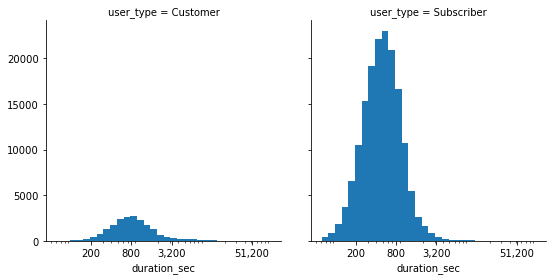

In [32]:
# histogram of duration time against user type
g= sb.FacetGrid(data=df, col='user_type', height=4, aspect=1)
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1)
g.map(plt.hist, 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([200, 800, 3200, 51200], [200, 800, '3,200', '51,200']);

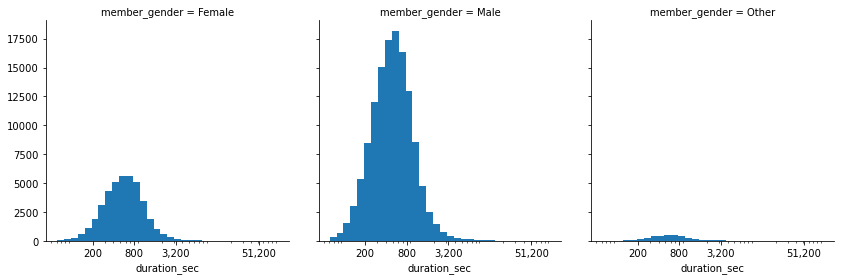

In [33]:
# histogram of duration time against member's gender
g= sb.FacetGrid(data=df, col='member_gender',col_wrap=3, height=4, aspect=1)
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1)
g.map(plt.hist, 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([200, 800, 3200, 51200], [200, 800, '3,200', '51,200']);

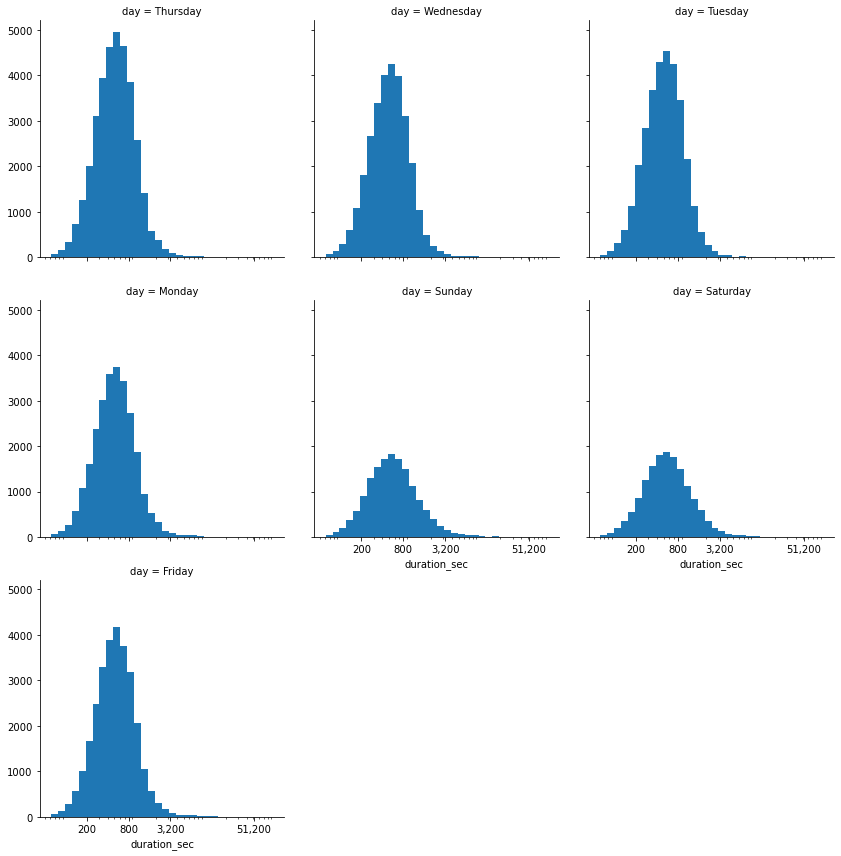

In [34]:
# histogram of duration time against different days
g= sb.FacetGrid(data=df, col='day',col_wrap=3, height=4, aspect=1)
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max())+0.1, 0.1)
g.map(plt.hist, 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([200, 800, 3200, 51200], [200, 800, '3,200', '51,200']);

Interesting, it appears that the non-subscriber group have longer duration time than subscriber gorup, and it is the only one whose average duration time is over 1000 seconds. The values of 1am-3am and non-gender groups are also higher than the others, but their population size is too small. 

Now, let's see the relationship between members' birth year and categoric variables.

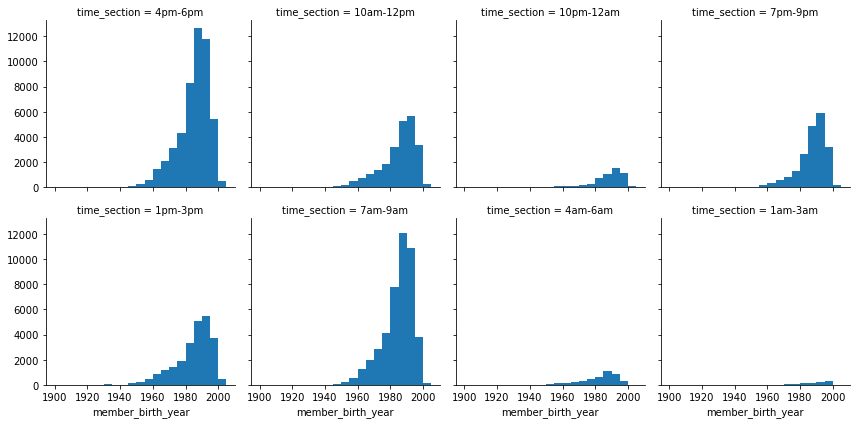

In [35]:
# histogram of members' birth year against different time section
g= sb.FacetGrid(data=df, col='time_section',col_wrap=4, height=3, aspect=1)
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
g.map(plt.hist, 'member_birth_year', bins=bins);

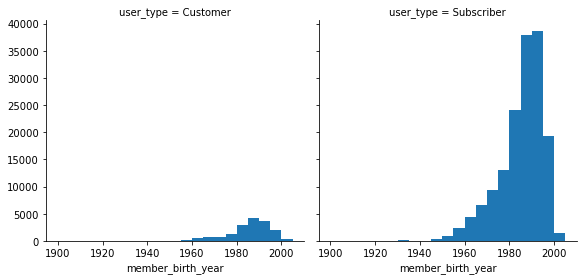

In [36]:
# histogram of members' birth year against user type
g= sb.FacetGrid(data=df, col='user_type',col_wrap=3, height=4, aspect=1)
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
g.map(plt.hist, 'member_birth_year', bins=bins);

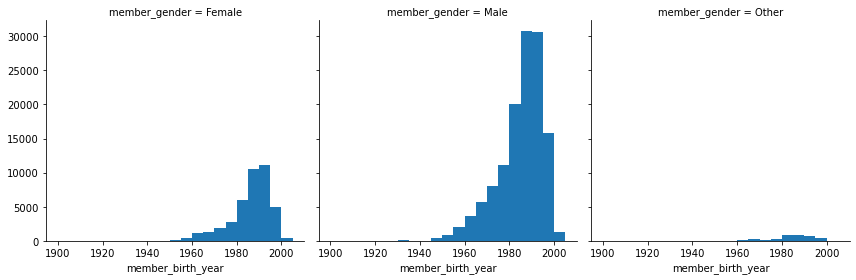

In [37]:
# histogram of members' birth year against members' gender
g= sb.FacetGrid(data=df, col='member_gender',col_wrap=3, height=4, aspect=1)
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
g.map(plt.hist, 'member_birth_year', bins=bins);

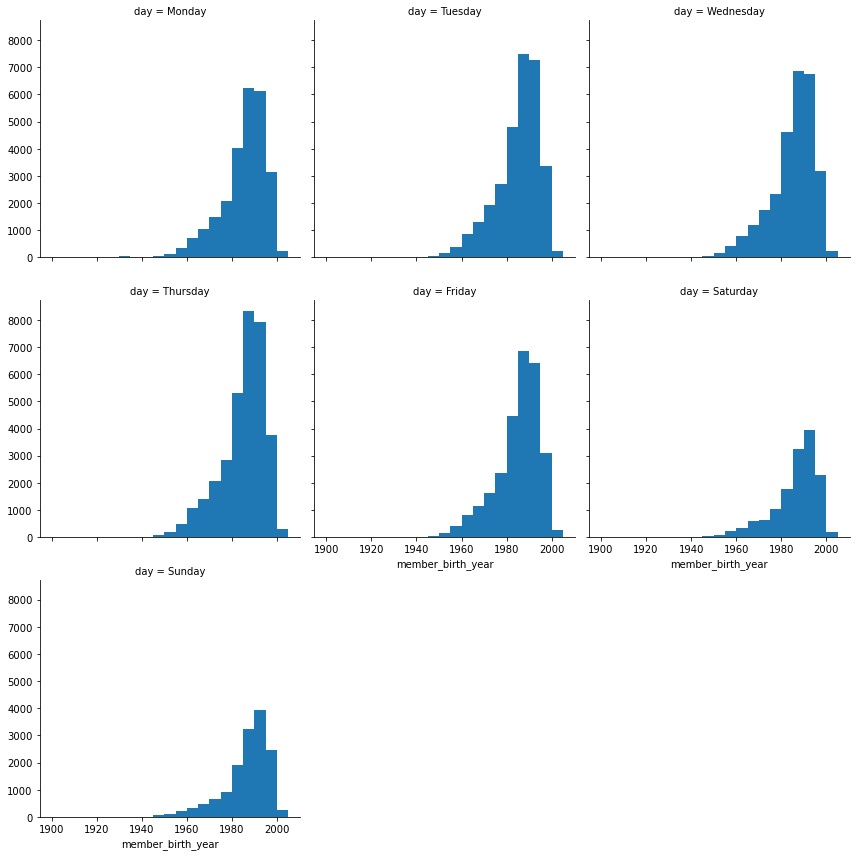

In [38]:
# histogram of members' birth day against the days of week
g= sb.FacetGrid(data=df, col='day',col_wrap=3, height=4, aspect=1, col_order=days)
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+5, 5)
g.map(plt.hist, 'member_birth_year', bins=bins);

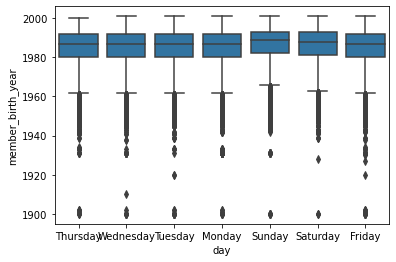

In [39]:
# boxplot of members' birth year against the days of week
sb.boxplot(data=df, x='day', y='member_birth_year', color=default_color);

According to the histogram of member_birth_year faceted by categoric variables, we find nothing special, they all appear that most people are born in 1985-1995. The boxplot also demonstrates same result, the distribution is similar. Accordingly, I would no longer take a deep look at members' birth year.


Next, I want to know the relationship between categorical variables. First, I am going to see the member gender.

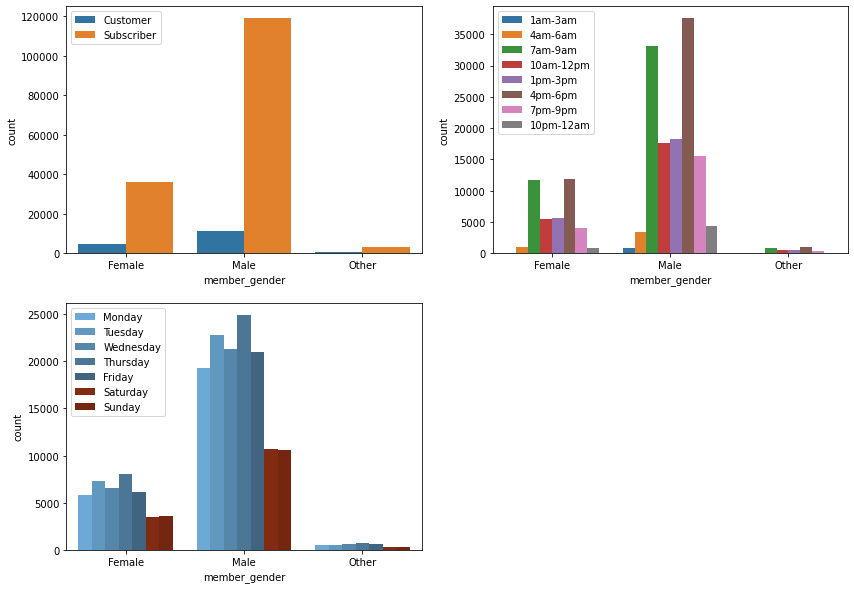

In [40]:
# cluster bar plot of member gender against other categorical variables
plt.figure(figsize=[14,10])
plt.subplot(2,2,1)
sb.countplot(data=df, x= 'member_gender', hue= 'user_type')
plt.legend(loc=2)

plt.subplot(2,2,2)
sb.countplot(data=df, x= 'member_gender', hue= 'time_section', hue_order = time_sec)
plt.legend(loc=2)

plt.subplot(2,2,3)
sb.countplot(data=df, x= 'member_gender', hue= 'day', hue_order = days, 
            palette=['#5aace8','#519ad0','#4889b9','#3e78a2', '#36678b','#932100', '#841d00'])
plt.legend(loc=2);

We have three plots above, but whatever variables the member_gender connects with, they all appear that the number of male is greater than the number of female and nothing is werid. Accordingly, the members' gender also won't be investigated deeper.

Next, I want to investigate the relationship between user_type with different time section and the days of week.

NameError: name 's' is not defined

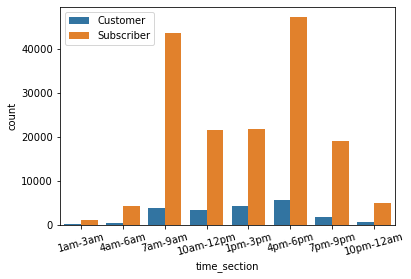

In [41]:
sb.countplot(data=df, x= 'time_section', hue= 'user_type', order = time_sec)
plt.legend(loc=2)
plt.xticks(rotation=15);

The most biggest gap between subscriber and non-subscriber is in rush hour.

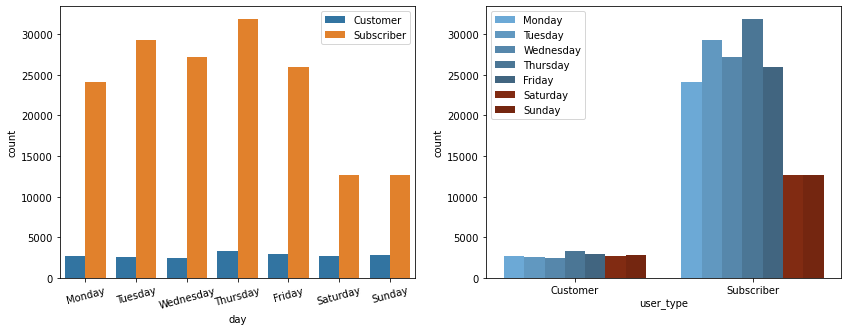

In [42]:
# cluster bar plot of user type against other categorical variables
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
sb.countplot(data=df, x= 'day', hue= 'user_type', order = days)
plt.legend(loc=1)
plt.xticks(rotation=15)

plt.subplot(1,2,2)
sb.countplot(data=df, x= 'user_type', hue= 'day', hue_order = days,
            palette=['#5aace8','#519ad0','#4889b9','#3e78a2', '#36678b','#932100', '#841d00'])
plt.legend(loc=2);

Although we have known that the renting number of subscriber is much higher than non-subscriber group, suprisely, I find that the renting number of non-subscriber group hold steady in each day of week. We can distinguish the two group more clearly when changing the x axis and hue.

In the end of part two, let's take a look on the relationship of time sections and the days of week.

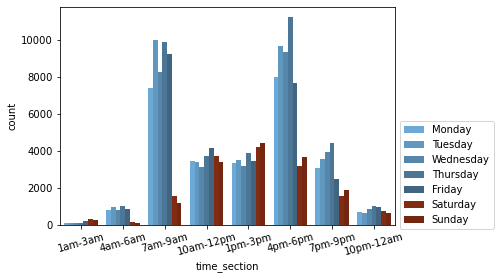

In [43]:
sb.countplot(data=df, x= 'time_section', hue= 'day', order= time_sec ,hue_order = days,
            palette=['#5aace8','#519ad0','#4889b9','#3e78a2', '#36678b','#932100', '#841d00'])
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1, 0.5));

Obviously, the biggest difference between weekday and weekend is the renting number of rush hour.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> In univariate exploration, we find that the most renting number happend in weekday and rush hour. Afterward, in the bivariate exploration, we find out what kind of people take the most trip, The population of renters consist mainly of male subscribers which born between 1985 to 1995.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Interesting, the duration time of non-subscribers is two times larger than subscribers'. Morever, in non-subscriber group, the renting number of weekday and weekend are almost same.


## Multivariate Exploration


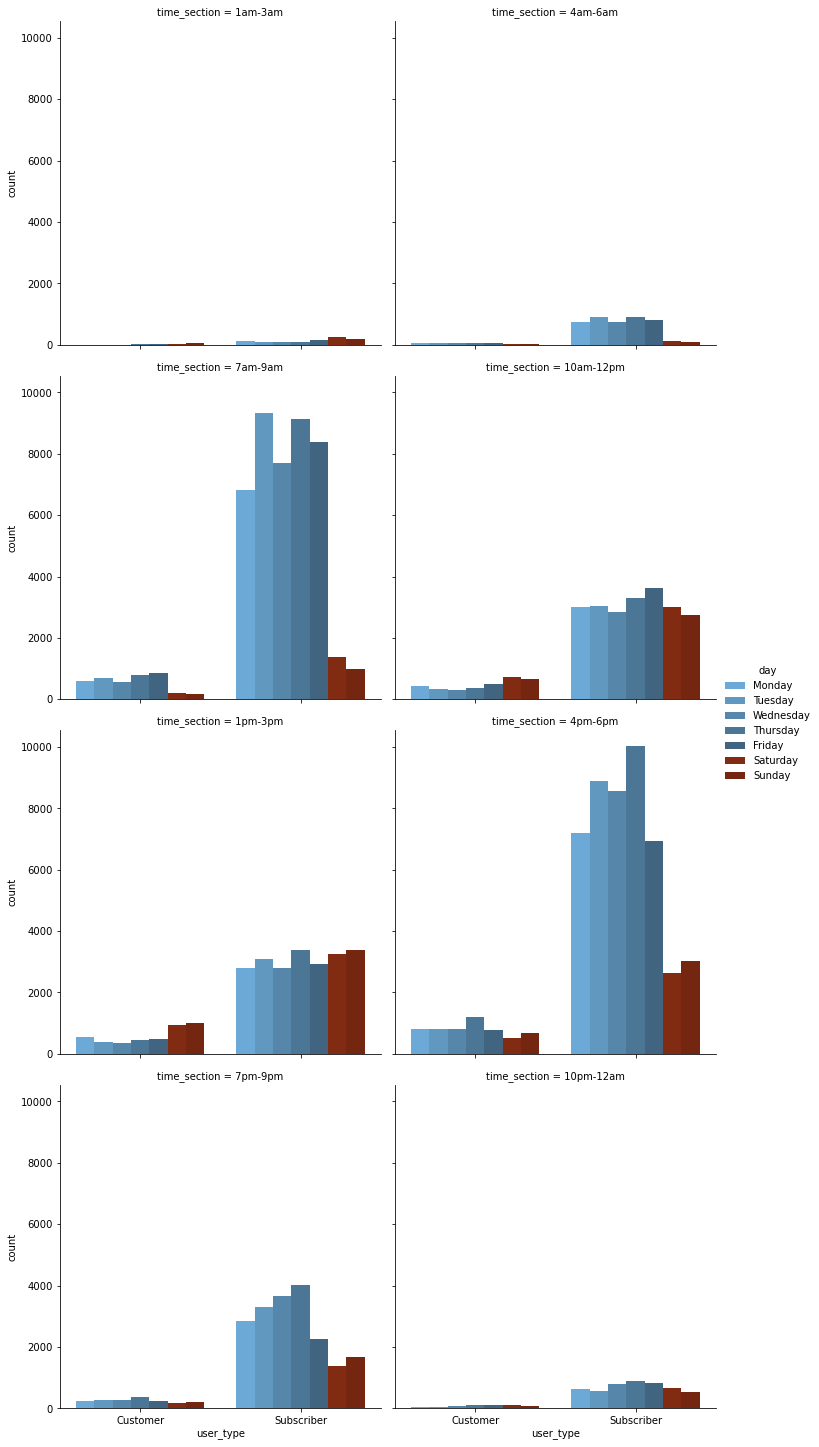

In [44]:
# create faceted cluster barplot on different time section
sb.catplot(data=df, x='user_type', hue='day', hue_order=days, 
           col='time_section', col_order=time_sec, kind='count', col_wrap = 2, 
           palette=['#5aace8','#519ad0','#4889b9','#3e78a2', '#36678b','#932100', '#841d00']);

It appears there are plenty of subscribers rent the bike in the rush hour of weekday.

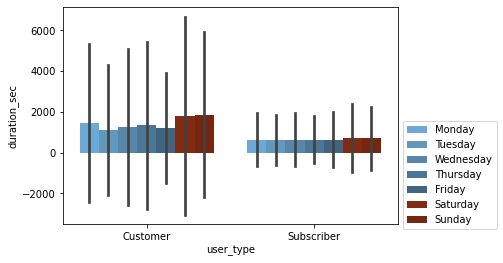

In [45]:
# create barplot with standard deviation
sb.barplot(data=df, x='user_type', y='duration_sec', hue='day', hue_order=days, ci='sd',
           palette=['#5aace8','#519ad0','#4889b9','#3e78a2', '#36678b','#932100', '#841d00'])
plt.legend(bbox_to_anchor=(1, 0.5));

Interestingly, the standard deviations of non-subscribers' duration time are larger than subscribers' duration time in each day.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> With cluster barplot (day, user_type) faceted by time section, we confirm again that the most trips happen in 7am-9am and 4pm-6pm of the weekday.

### Were there any interesting or surprising interactions between features?

> In the cluster bar chart of the `user_type` and `day`, we found that non-subscriber group have no gap between weekday and weekend. Then, I facet the cluster bar chart with `time_section`, we can see that in the rush hour, the renting number of weekday are still greater than the renting number of weekend as same as subscriber group. However, in the other hour, such as 10am-12pm and 1pm-3pm, the renting number of weekday are less than the weekend's, so it makes the renting number of everyday similar.   

> Interestingly, the standard deviation of non-subscribers' duration time is almost larger than subscribers' duration time in every time section. It may means that subscribers have consistent reason to rent bikes, for example, they want to rent a bike for commuting on weekday. However, the non-subscribers may just rent bikes for exercise or just travel around the city.